In [1]:
import pandas as pd 
import numpy as np 
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, precision_score
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

In [2]:
d1 = pd.read_csv('h1n1_vaccine_prediction.csv')

In [3]:
d1

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,White,Female,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
26703,26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Rent,Employed,"MSA, Principle City",1.0,0.0,0
26704,26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,White,Female,NaN,Not Married,Own,NaN,"MSA, Not Principle City",0.0,0.0,0
26705,26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,...,Hispanic,Female,"<= $75,000, Above Poverty",Married,Rent,Employed,Non-MSA,1.0,0.0,0


In [4]:
d1.head(10)

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0
5,5,3.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,White,Male,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Principle City",2.0,3.0,0
6,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",0.0,0.0,0
7,7,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,Non-MSA,2.0,0.0,1
8,8,0.0,2.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,...,White,Male,"> $75,000",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0
9,9,2.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,"MSA, Not Principle City",0.0,0.0,0


In [5]:
d1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   unique_id                  26707 non-null  int64  
 1   h1n1_worry                 26615 non-null  float64
 2   h1n1_awareness             26591 non-null  float64
 3   antiviral_medication       26636 non-null  float64
 4   contact_avoidance          26499 non-null  float64
 5   bought_face_mask           26688 non-null  float64
 6   wash_hands_frequently      26665 non-null  float64
 7   avoid_large_gatherings     26620 non-null  float64
 8   reduced_outside_home_cont  26625 non-null  float64
 9   avoid_touch_face           26579 non-null  float64
 10  dr_recc_h1n1_vacc          24547 non-null  float64
 11  dr_recc_seasonal_vacc      24547 non-null  float64
 12  chronic_medic_condition    25736 non-null  float64
 13  cont_child_undr_6_mnths    25887 non-null  flo

In [6]:
d1.columns

Index(['unique_id', 'h1n1_worry', 'h1n1_awareness', 'antiviral_medication',
       'contact_avoidance', 'bought_face_mask', 'wash_hands_frequently',
       'avoid_large_gatherings', 'reduced_outside_home_cont',
       'avoid_touch_face', 'dr_recc_h1n1_vacc', 'dr_recc_seasonal_vacc',
       'chronic_medic_condition', 'cont_child_undr_6_mnths',
       'is_health_worker', 'has_health_insur', 'is_h1n1_vacc_effective',
       'is_h1n1_risky', 'sick_from_h1n1_vacc', 'is_seas_vacc_effective',
       'is_seas_risky', 'sick_from_seas_vacc', 'age_bracket', 'qualification',
       'race', 'sex', 'income_level', 'marital_status', 'housing_status',
       'employment', 'census_msa', 'no_of_adults', 'no_of_children',
       'h1n1_vaccine'],
      dtype='object')

In [7]:
d1.columns[0]

'unique_id'

In [8]:
### Missing value Treatment

for i in d1.columns:
    if (d1[i].isnull().sum())>0:
        d1[i].fillna(d1[i].mode()[0],inplace=True)

In [9]:
d1['h1n1_worry'].mode()[0]

2.0

If the percentage of missing values are more than 70% than we need to drop the entire column otherwise we need to impute it

# 1.Exploratory Data Analysis

In [10]:
v = d1['h1n1_vaccine'].value_counts()
v

0    21033
1     5674
Name: h1n1_vaccine, dtype: int64

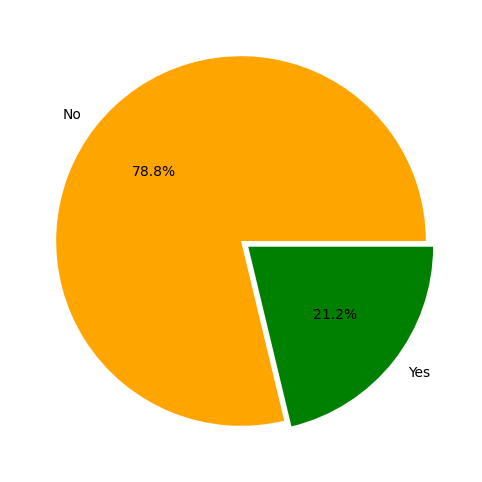

In [11]:
plt.figure(figsize=(10,6))
labels=['No','Yes']
explode=[0,.05]
mycolors=['Orange','Green']
size=d1['h1n1_vaccine'].value_counts().values
plt.pie(size,explode=explode,labels=labels,colors=mycolors,autopct="%1.1f%%")
plt.show()

Based on my Hypothesis the Race, income level, housing_status, marital_status, no_of_adults, no_of_children features are not important

In [12]:
## Let's Check the string values

d1_obj = d1.select_dtypes(include=np.object_)
d1_obj

,age_bracket,qualification,race,sex,income_level,marital_status,housing_status,employment,census_msa
0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA
1,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City"
2,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City"
3,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City"
4,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City"
...,...,...,...,...,...,...,...,...,...
26702,65+ Years,Some College,White,Female,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,Non-MSA
26703,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Rent,Employed,"MSA, Principle City"
26704,55 - 64 Years,Some College,White,Female,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City"
26705,18 - 34 Years,Some College,Hispanic,Female,"<= $75,000, Above Poverty",Married,Rent,Employed,Non-MSA


In [13]:
#d1_obj.columns

Index(['age_bracket', 'qualification', 'race', 'sex', 'income_level',
       'marital_status', 'housing_status', 'employment', 'census_msa'],
      dtype='object')

In [14]:
## Label Encoding 
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
cols=['age_bracket', 'qualification', 'race', 'sex', 'income_level',
       'marital_status', 'housing_status', 'employment', 'census_msa']
for i in cols:
    d1[i]=le.fit_transform(d1[i])

In [15]:
d1

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,3,0,2,1,0,1,2,0.0,0.0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,3,1,2,1,1,0,0,0.0,0.0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,3,1,0,1,0,0,0,2.0,0.0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,3,0,2,1,1,1,1,0.0,0.0,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,3,0,0,0,0,0,0,1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,3,0,0,1,0,1,2,0.0,0.0,0
26703,26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,3,1,0,1,1,0,1,1.0,0.0,0
26704,26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,3,0,0,1,0,0,0,0.0,0.0,0
26705,26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1,0,0,0,1,0,2,1.0,0.0,0


# Checking our Hypothesis

In [16]:
d1

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,3,0,2,1,0,1,2,0.0,0.0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,3,1,2,1,1,0,0,0.0,0.0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,3,1,0,1,0,0,0,2.0,0.0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,3,0,2,1,1,1,1,0.0,0.0,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,3,0,0,0,0,0,0,1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,3,0,0,1,0,1,2,0.0,0.0,0
26703,26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,3,1,0,1,1,0,1,1.0,0.0,0
26704,26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,3,0,0,1,0,0,0,0.0,0.0,0
26705,26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1,0,0,0,1,0,2,1.0,0.0,0


In [17]:
l1=['unique_id','bought_face_mask','wash_hands_frequently','avoid_large_gatherings','reduced_outside_home_cont','avoid_touch_face','sex','income_level','marital_status','housing_status','employment','no_of_children','no_of_adults']
for i in l1:
    d1=d1.drop(columns=i)
d1

,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,dr_recc_h1n1_vacc,dr_recc_seasonal_vacc,chronic_medic_condition,cont_child_undr_6_mnths,is_health_worker,has_health_insur,...,is_h1n1_risky,sick_from_h1n1_vacc,is_seas_vacc_effective,is_seas_risky,sick_from_seas_vacc,age_bracket,qualification,race,census_msa,h1n1_vaccine
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,2.0,2.0,1.0,2.0,3,1,3,2,0
1,3.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,4.0,4.0,4.0,2.0,4.0,1,0,3,0,0
2,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,1.0,1.0,4.0,1.0,2.0,0,2,3,0,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,...,3.0,5.0,5.0,4.0,1.0,4,0,3,1,0
4,2.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,3.0,2.0,3.0,1.0,4.0,2,3,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,2.0,2.0,4,3,3,2,0
26703,1.0,2.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,...,2.0,2.0,5.0,1.0,1.0,0,2,3,1,0
26704,2.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,4.0,2.0,5.0,4.0,2.0,3,3,3,0,0
26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,2.0,2.0,1.0,2.0,0,3,1,2,0


# Balancing the data using SMOTE

In [18]:
from sklearn.feature_selection import chi2

In [19]:
x1=d1.drop('h1n1_vaccine',axis=1)
y1=d1.h1n1_vaccine

In [20]:
fscore=chi2(x1,y1)
fscore

(array([2.01358892e+02, 1.11808117e+02, 4.11096977e+01, 1.59504077e+01,
        3.30781019e+03, 8.92499456e+02, 1.72886102e+02, 1.09342915e+02,
        6.72405011e+02, 3.04643931e+00, 4.95639893e+02, 1.91415123e+03,
        1.15654361e+02, 2.43320341e+02, 1.22231992e+03, 2.01581768e+00,
        4.37694949e+01, 2.01459556e+01, 1.49313640e+01, 3.83927863e-03]),
 array([1.05510630e-045, 3.93620890e-026, 1.43920477e-010, 6.50237709e-005,
        0.00000000e+000, 4.19137320e-196, 1.73317808e-039, 1.36504702e-025,
        2.99632034e-148, 8.09143610e-002, 8.44597327e-110, 0.00000000e+000,
        5.65791678e-027, 7.42579815e-055, 8.60189894e-268, 1.55667387e-001,
        3.69418347e-011, 7.17518036e-006, 1.11493915e-004, 9.50593163e-001]))

In [21]:
p_value=pd.Series(fscore[1],index=x1.columns)

In [22]:
irr_cols=[]

for x in p_value.index:
    if p_value[x] <= 0.05:
        print(x, ':- Reject Null Hypothesis')
    else:
        print(x,':- Accept the Hypothesis')
        irr_cols.append(x)


h1n1_worry :- Reject Null Hypothesis
h1n1_awareness :- Reject Null Hypothesis
antiviral_medication :- Reject Null Hypothesis
contact_avoidance :- Reject Null Hypothesis
dr_recc_h1n1_vacc :- Reject Null Hypothesis
dr_recc_seasonal_vacc :- Reject Null Hypothesis
chronic_medic_condition :- Reject Null Hypothesis
cont_child_undr_6_mnths :- Reject Null Hypothesis
is_health_worker :- Reject Null Hypothesis
has_health_insur :- Accept the Hypothesis
is_h1n1_vacc_effective :- Reject Null Hypothesis
is_h1n1_risky :- Reject Null Hypothesis
sick_from_h1n1_vacc :- Reject Null Hypothesis
is_seas_vacc_effective :- Reject Null Hypothesis
is_seas_risky :- Reject Null Hypothesis
sick_from_seas_vacc :- Accept the Hypothesis
age_bracket :- Reject Null Hypothesis
qualification :- Reject Null Hypothesis
race :- Reject Null Hypothesis
census_msa :- Accept the Hypothesis


In [23]:
d1.drop(irr_cols,axis=1, inplace=True)
d1.head()

,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,dr_recc_h1n1_vacc,dr_recc_seasonal_vacc,chronic_medic_condition,cont_child_undr_6_mnths,is_health_worker,is_h1n1_vacc_effective,is_h1n1_risky,sick_from_h1n1_vacc,is_seas_vacc_effective,is_seas_risky,age_bracket,qualification,race,h1n1_vaccine
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,2.0,2.0,1.0,3,1,3,0
1,3.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0,4.0,4.0,4.0,2.0,1,0,3,0
2,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,1.0,1.0,4.0,1.0,0,2,3,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,3.0,3.0,5.0,5.0,4.0,4,0,3,0
4,2.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,2.0,3.0,1.0,2,3,3,0


# Analying the data

<Axes: xlabel='h1n1_awareness', ylabel='count'>

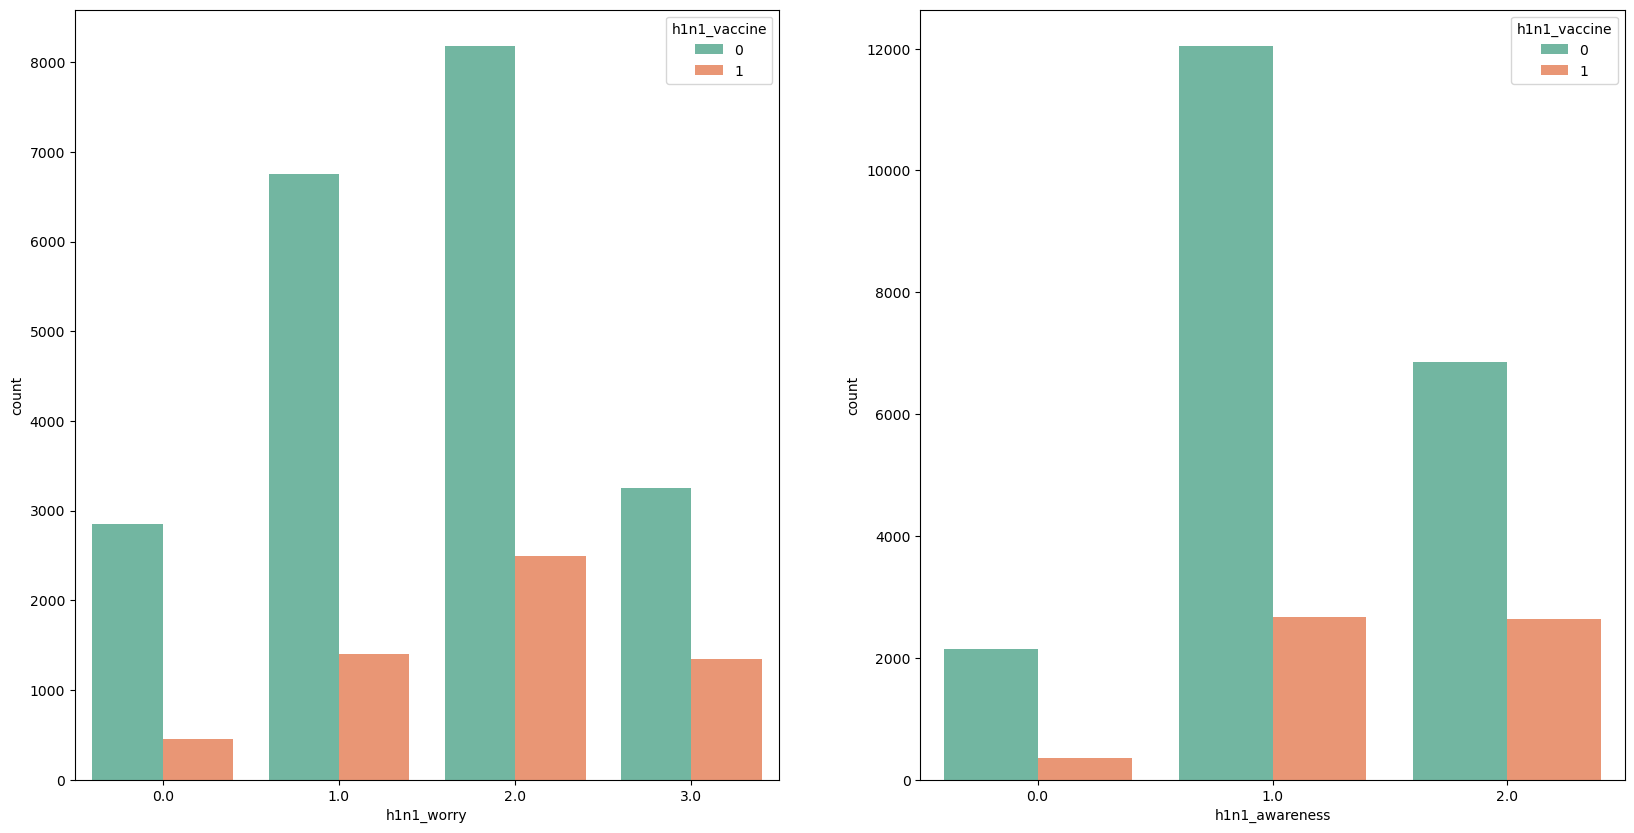

In [24]:
fig,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x='h1n1_worry', hue='h1n1_vaccine', data=d1, palette='Set2',ax=ax[0])
sns.countplot(x='h1n1_awareness', hue='h1n1_vaccine', data=d1, palette='Set2',ax=ax[1])

1.In first plot we can observed that people who are somewhat worried or worried are likely to take h1n1_vaccine

2.In second plot we can observed that most people are not aware of h1n1 vaccine so awareness has highly impact to take vaccine

In [25]:
x=d1.drop(columns = ['h1n1_vaccine'])
y=d1['h1n1_vaccine']

In [26]:
from imblearn.over_sampling import SMOTE

sm=SMOTE(random_state=23)
x_sm,y_sm = sm.fit_resample(x,y)

In [27]:
x_train,x_test,y_train,y_test = train_test_split(x_sm,y_sm, test_size= 0.20, random_state = 355)


In [28]:
from sklearn.linear_model import LogisticRegression

In [29]:
log_reg=LogisticRegression()
log_reg.fit(x_train,y_train)

LogisticRegression()

In [30]:
val=log_reg.coef_
val

array([[-7.99327547e-02,  2.14771910e-01, -9.50587779e-02,
        -1.24803381e-03,  2.29199678e+00, -6.84055787e-01,
         2.19215822e-03,  1.72446545e-02,  7.31096432e-01,
         6.47656818e-01,  3.62827030e-01, -6.15784842e-02,
         1.15595427e-01,  1.38731014e-01,  6.98425683e-02,
        -4.49326544e-02,  3.76113809e-02]])

In [31]:
y_pred=log_reg.predict(x_test)

In [32]:
y_test

26812    1
39175    1
39929    1
35515    1
28962    1
        ..
7455     0
33482    1
6246     0
8468     0
28961    1
Name: h1n1_vaccine, Length: 8414, dtype: int64

In [33]:
accuracy=accuracy_score(y_test,y_pred)*100
accuracy

76.07558830520561

In [34]:
# Area Under Curve
auc = roc_auc_score(y_test,y_pred)*100
auc

76.11782140888954

In [35]:
cm = confusion_matrix(y_pred,y_test)
cm

array([[3254, 1130],
       [ 883, 3147]], dtype=int64)

In [36]:
from sklearn.metrics import recall_score
precision_score(y_test,y_pred)*100

78.08933002481389

In [37]:
from sklearn.metrics import f1_score
f1_score(y_test,y_pred)*100

75.76742506319971

In [38]:
fpr,tpr,thresholds = roc_curve(y_test,y_pred)

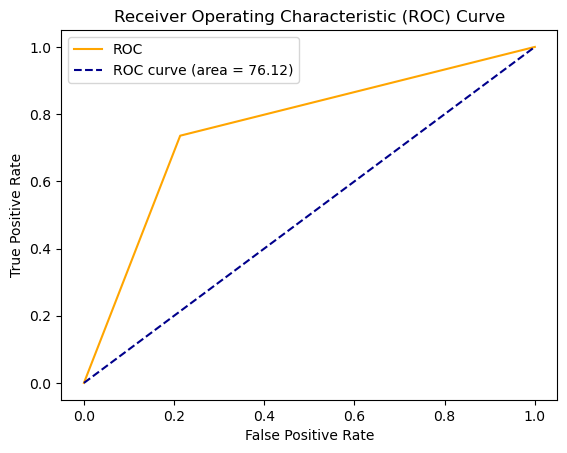

In [39]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

Text(120.72222222222221, 0.5, 'Truth')

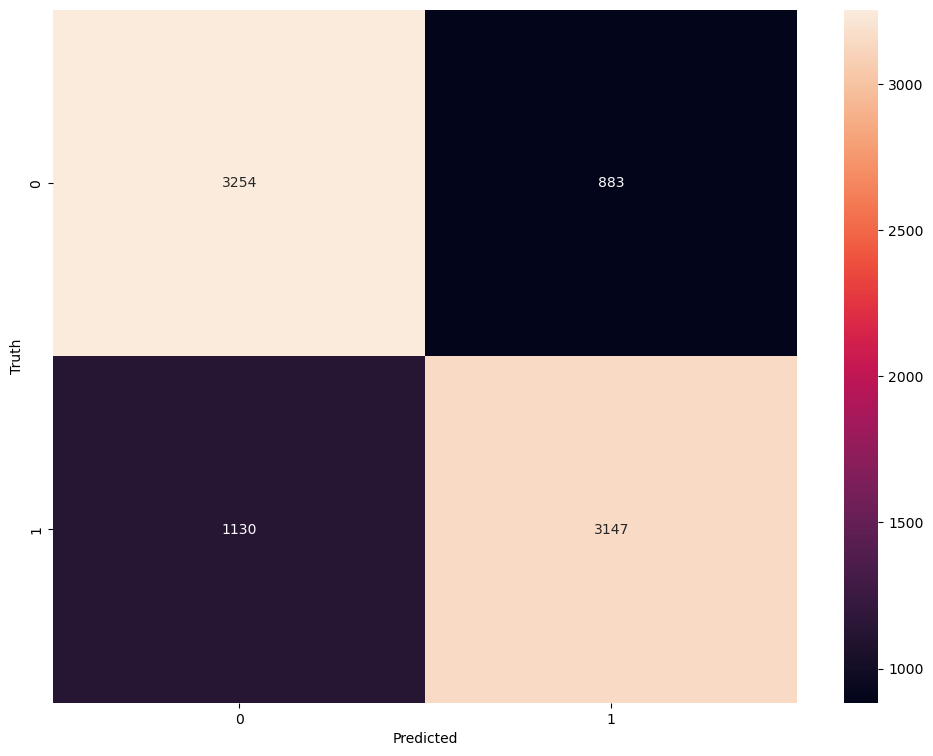

In [40]:
cm=confusion_matrix(y_test,y_pred)

plt.figure(figsize=(12,9))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [41]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_d1= [variance_inflation_factor(x.values, i)
                          for i in range(len(x.columns))]

In [42]:
vif_d1

[5.785535264968795,
 5.590211791819532,
 1.0835995098623246,
 3.8841642083757275,
 2.0970619195420825,
 2.428806441641341,
 1.5200580655748857,
 1.1106358525457716,
 1.1929607219742155,
 18.90621090872674,
 7.388476762091713,
 4.71141674849956,
 19.70413597827462,
 8.082286956873121,
 3.6237163336629754,
 3.5852155019879803,
 8.085454649586138]

In [43]:
cor=d1.corr()
cor

,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,dr_recc_h1n1_vacc,dr_recc_seasonal_vacc,chronic_medic_condition,cont_child_undr_6_mnths,is_health_worker,is_h1n1_vacc_effective,is_h1n1_risky,sick_from_h1n1_vacc,is_seas_vacc_effective,is_seas_risky,age_bracket,qualification,race,h1n1_vaccine
h1n1_worry,1.000000,0.060828,0.089866,0.229648,0.136957,0.120670,0.092249,0.048400,0.032734,0.235841,0.372716,0.355637,0.231649,0.327986,0.060573,-0.047970,-0.130248,0.121574
h1n1_awareness,0.060828,1.000000,-0.010450,0.087194,0.094135,0.074376,-0.011653,0.025971,0.171516,0.119010,0.074394,-0.017038,0.085281,0.081156,-0.045029,0.168564,0.150439,0.117771
antiviral_medication,0.089866,-0.010450,1.000000,0.048533,0.050882,0.031682,0.004637,0.026183,0.007145,0.030172,0.102553,0.076930,0.014498,0.081503,-0.094191,-0.027888,-0.110963,0.040226
contact_avoidance,0.229648,0.087194,0.048533,1.000000,0.065589,0.070761,0.042054,0.000952,0.002232,0.109066,0.116259,0.129983,0.117356,0.127991,0.003369,0.014385,0.001699,0.046837
dr_recc_h1n1_vacc,0.136957,0.094135,0.050882,0.065589,1.000000,0.603152,0.152020,0.078306,0.098237,0.150546,0.247630,0.106671,0.103365,0.193956,0.006036,0.025944,-0.014451,0.394086
dr_recc_seasonal_vacc,0.120670,0.074376,0.031682,0.070761,0.603152,1.000000,0.203121,0.038741,0.058775,0.119691,0.156752,0.062781,0.171801,0.228514,0.149520,-0.007859,0.010589,0.218976
chronic_medic_condition,0.092249,-0.011653,0.004637,0.042054,0.152020,0.203121,1.000000,0.003533,-0.019810,0.046389,0.121849,0.082861,0.093160,0.166381,0.205219,-0.037859,0.006875,0.094360
cont_child_undr_6_mnths,0.048400,0.025971,0.026183,0.000952,0.078306,0.038741,0.003533,1.000000,0.082023,0.008373,0.087016,0.038295,0.005304,0.053479,-0.097515,-0.014197,-0.039799,0.066712
is_health_worker,0.032734,0.171516,0.007145,0.002232,0.098237,0.058775,-0.019810,0.082023,1.000000,0.054362,0.124095,0.010536,0.032069,0.092542,-0.078269,0.093194,0.007262,0.168056
is_h1n1_vacc_effective,0.235841,0.119010,0.030172,0.109066,0.150546,0.119691,0.046389,0.008373,0.054362,1.000000,0.259813,0.061805,0.469367,0.256131,0.017306,0.021659,0.039531,0.267352


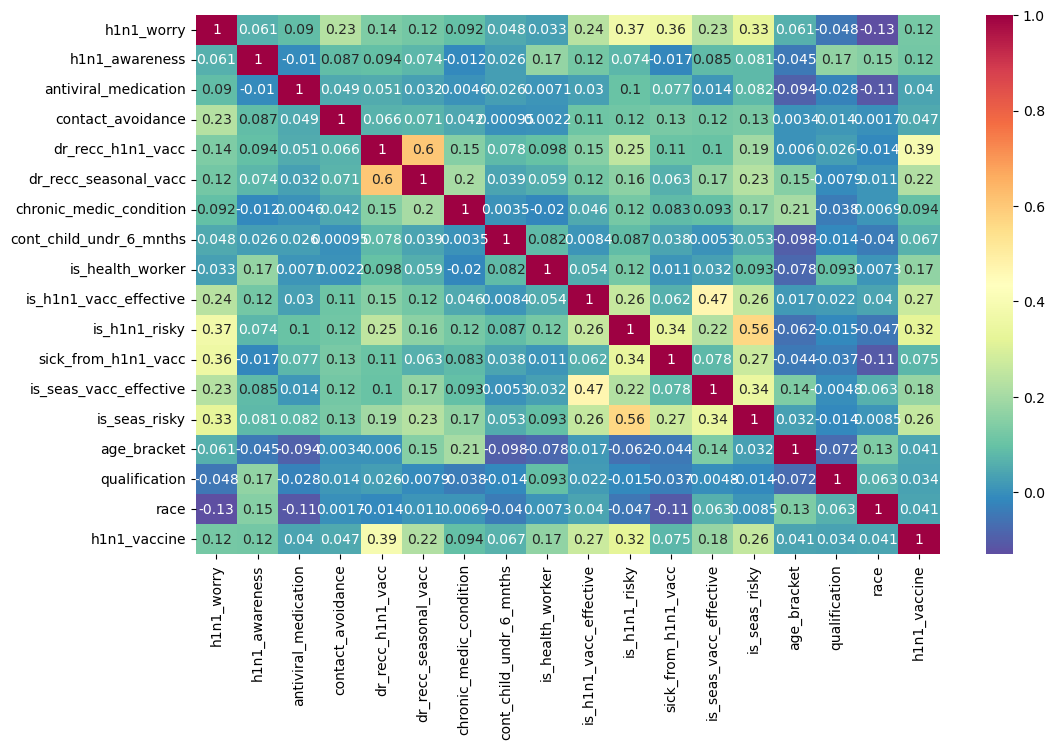

In [44]:
plt.figure(figsize= (12,7))
cor = d1.corr()
sns.heatmap(cor, annot = True, cmap = 'Spectral_r')
plt.show()

In [45]:
d1.head()

,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,dr_recc_h1n1_vacc,dr_recc_seasonal_vacc,chronic_medic_condition,cont_child_undr_6_mnths,is_health_worker,is_h1n1_vacc_effective,is_h1n1_risky,sick_from_h1n1_vacc,is_seas_vacc_effective,is_seas_risky,age_bracket,qualification,race,h1n1_vaccine
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,2.0,2.0,1.0,3,1,3,0
1,3.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0,4.0,4.0,4.0,2.0,1,0,3,0
2,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,1.0,1.0,4.0,1.0,0,2,3,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,3.0,3.0,5.0,5.0,4.0,4,0,3,0
4,2.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,2.0,3.0,1.0,2,3,3,0


In [46]:
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score, precision_score

accuracy = accuracy_score(y_test, y_pred)*100
roc_auc_score = roc_auc_score(y_test, y_pred)*100
precision_score = precision_score(y_test, y_pred)*100
f1score = f1_score(y_test, y_pred)*100

print(f"Accuracy = {accuracy.round(4)}")
print(f"roc_auc_score = {roc_auc_score.round(4)}")
print(f"precision_score = {precision_score.round(4)}")
print(f"F1 Score = {f1score.round(4)}")

Accuracy = 76.0756
roc_auc_score = 76.1178
precision_score = 78.0893
F1 Score = 75.7674
